In [26]:
import pandas as pd
import pm4py
from helpers import get_field_position
from pm4py.objects.ocel.util.log_ocel import log_to_ocel_multiple_obj_types as log_to_ocel

In [ ]:
df = pd.read_csv('sample-data\data\Sample_Game_1\Sample_Game_1_RawEventsData.csv')
df['case:concept:name'] = df.index.astype(str)
#df['activity'] = df['Type'] #+ df['Subtype'].fillna('').apply(lambda s: f' - {s}' if s else '')
df['timestamp'] = pd.to_datetime(df['Start Time [s]'], unit='s', origin='unix')
df['attribute:duration'] = df['End Time [s]'] - df['Start Time [s]']
#df['player']= df.apply(lambda row: [row["From"], row["To"]], axis=1)
df['attribute:travel_distance'] = ((df['End X'] - df['Start X'])**2 + (df['End Y'] - df['Start Y'])**2)**0.5
df['start_grid'] = df.apply(lambda row: [get_field_position(row["Start X"], row["Start Y"], x_fields=10, y_fields=10)], axis=1)
df['end_grid'] = df.apply(lambda row: [get_field_position(row["End X"], row["End Y"], x_fields=10, y_fields=10)], axis=1)
df['crossed_grid'] = df['start_grid'] != df['end_grid']


#df.rename(columns={
#    'event_id': 'ocel:eid',
#    'activity': 'ocel:activity',
#    'timestamp': 'ocel:timestamp',
#    'From': 'ocel:type:from',
#    'To': 'ocel:type:to',
#    'Subtype': 'ocel:subtype',
#    'Start X': 'ocel:location:start_x',
#    'Start Y': 'ocel:location:start_y',
#    'End X': 'ocel:location:end_x',
#    'End Y': 'ocel:location:end_y'
#}, inplace=True)

df.rename(columns={
    #'Team': 'case:concept:name',
    'Type': 'concept:name',
    'timestamp': 'time:timestamp',
    #'From': 'ocel:type:from',
    #'To': 'ocel:type:to',
    'Subtype': 'attribute:subtype',
    'Start X': 'attribute:start_x',
    'Start Y': 'attribute:start_y',
    'End X': 'attribute:end_x',
    'End Y': 'attribute:end_y'
}, inplace=True)
df
#df.to_csv('sample-data\data\Sample_Game_1\Sample_Game_1_RawEventsData_ocel.csv', index=False)

,Team,concept:name,attribute:subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,...,attribute:start_y,attribute:end_x,attribute:end_y,case:concept:name,time:timestamp,attribute:duration,attribute:travel_distance,start_grid,end_grid,crossed_grid
0,Away,SET PIECE,KICK OFF,1,1,0.04,0,0.00,Player19,NaN,...,NaN,NaN,NaN,0,1970-01-01 00:00:00.040,-0.04,NaN,[None],[None],False
1,Away,PASS,NaN,1,1,0.04,3,0.12,Player19,Player21,...,0.39,0.55,0.43,1,1970-01-01 00:00:00.040,0.08,0.107703,[B2],[C2],True
2,Away,PASS,NaN,1,3,0.12,17,0.68,Player21,Player15,...,0.43,0.58,0.21,2,1970-01-01 00:00:00.120,0.56,0.222036,[C2],[C1],True
3,Away,PASS,NaN,1,45,1.80,61,2.44,Player15,Player19,...,0.19,0.45,0.31,3,1970-01-01 00:00:01.800,0.64,0.156205,[C1],[B2],True
4,Away,PASS,NaN,1,77,3.08,96,3.84,Player19,Player21,...,0.32,0.49,0.47,4,1970-01-01 00:00:03.080,0.76,0.155242,[B2],[B2],False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1740,Home,PASS,NaN,2,143361,5734.44,143483,5739.32,Player12,Player13,...,0.33,0.19,0.95,1740,1970-01-01 01:35:34.440,4.88,0.743303,[C2],[A4],True
1741,Home,PASS,NaN,2,143578,5743.12,143593,5743.72,Player13,Player4,...,0.88,0.14,0.69,1741,1970-01-01 01:35:43.120,0.60,0.196469,[A4],[A3],True
1742,Home,BALL LOST,INTERCEPTION,2,143598,5743.92,143618,5744.72,Player4,NaN,...,0.69,0.07,0.61,1742,1970-01-01 01:35:43.920,0.80,0.100000,[A3],[A3],False
1743,Away,RECOVERY,BLOCKED,2,143617,5744.68,143617,5744.68,Player16,NaN,...,0.62,NaN,NaN,1743,1970-01-01 01:35:44.680,0.00,NaN,[A3],[None],True


In [46]:
np.max(df['attribute:start_y'])

np.float64(1.01)

In [47]:
np.unique(df['concept:name'])

array(['BALL LOST', 'BALL OUT', 'CARD', 'CHALLENGE', 'FAULT RECEIVED',
       'PASS', 'RECOVERY', 'SET PIECE', 'SHOT'], dtype=object)

In [54]:
df[df['concept:name']=='BALL OUT']

,Team,concept:name,attribute:subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,...,attribute:start_y,attribute:end_x,attribute:end_y,case:concept:name,time:timestamp,attribute:duration,attribute:travel_distance,start_grid,end_grid,crossed_grid
30,Away,BALL OUT,NaN,1,1374,54.96,1425,57.00,Player15,NaN,...,0.29,1.05,0.17,30,1970-01-01 00:00:54.960,2.04,0.216333,[D2],[E1],True
41,Away,BALL OUT,NaN,1,4093,163.72,4164,166.56,Player25,NaN,...,0.56,0.49,1.04,41,1970-01-01 00:02:43.720,2.84,0.651153,[D3],[B5],True
52,Home,BALL OUT,NaN,1,4751,190.04,4836,193.44,Player7,NaN,...,0.78,0.67,1.03,52,1970-01-01 00:03:10.040,3.40,0.375366,[B4],[C5],True
122,Home,BALL OUT,NaN,1,8753,350.12,8843,353.72,Player8,NaN,...,0.21,0.74,-0.04,122,1970-01-01 00:05:50.120,3.60,0.265707,[C1],[C1],False
127,Home,BALL OUT,NaN,1,9098,363.92,9127,365.08,Player3,NaN,...,0.10,0.05,-0.04,127,1970-01-01 00:06:03.920,1.16,0.143178,[A1],[A1],False
137,Away,BALL OUT,NaN,1,9634,385.36,9663,386.52,Player25,NaN,...,0.44,1.03,0.33,137,1970-01-01 00:06:25.360,1.16,0.125300,[D2],[E2],True
164,Home,BALL OUT,HEAD-CLEARANCE,1,12033,481.32,12047,481.88,Player1,NaN,...,0.62,-0.05,0.71,164,1970-01-01 00:08:01.320,0.56,0.127279,[A3],[A3],False
166,Away,BALL OUT,NaN,1,12636,505.44,12702,508.08,Player21,NaN,...,0.95,-0.03,0.34,166,1970-01-01 00:08:25.440,2.64,0.611310,[A4],[A2],True
182,Away,BALL OUT,CLEARANCE,1,13886,555.44,13987,559.48,Player16,NaN,...,0.48,0.96,-0.04,182,1970-01-01 00:09:15.440,4.04,0.524690,[D2],[D1],True
229,Away,BALL OUT,NaN,1,16471,658.84,16543,661.72,Player15,NaN,...,0.13,1.03,0.20,229,1970-01-01 00:10:58.840,2.88,0.240416,[D1],[E1],True


In [57]:
df.iloc[1720:1740]

,Team,concept:name,attribute:subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,...,attribute:start_y,attribute:end_x,attribute:end_y,case:concept:name,time:timestamp,attribute:duration,attribute:travel_distance,start_grid,end_grid,crossed_grid
1720,Away,PASS,NaN,2,141185,5647.40,141230,5649.20,Player28,Player27,...,0.42,0.77,0.06,1720,1970-01-01 01:34:07.400,1.80,0.376431,[C2],[D1],True
1721,Home,CHALLENGE,TACKLE-LOST,2,141404,5656.16,141404,5656.16,Player14,NaN,...,0.11,NaN,NaN,1721,1970-01-01 01:34:16.160,0.00,NaN,[D1],[None],True
1722,Away,PASS,NaN,2,141436,5657.44,141451,5658.04,Player27,Player28,...,0.03,0.78,0.13,1722,1970-01-01 01:34:17.440,0.60,0.128062,[D1],[D1],False
1723,Away,BALL OUT,NaN,2,141541,5661.64,141548,5661.92,Player28,NaN,...,0.18,1.02,0.33,1723,1970-01-01 01:34:21.640,0.28,0.274591,[D1],[E2],True
1724,Home,RECOVERY,NaN,2,141552,5662.08,141552,5662.08,Player11,NaN,...,0.42,NaN,NaN,1724,1970-01-01 01:34:22.080,0.00,NaN,[D2],[None],True
1725,Home,BALL OUT,GOAL KICK,2,142259,5690.36,142394,5695.76,Player11,NaN,...,0.47,0.38,1.02,1725,1970-01-01 01:34:50.360,5.40,0.806598,[D2],[B5],True
1726,Home,CHALLENGE,AERIAL-LOST,2,142394,5695.76,142394,5695.76,Player8,NaN,...,0.92,NaN,NaN,1726,1970-01-01 01:34:55.760,0.00,NaN,[B4],[None],True
1727,Away,SET PIECE,THROW IN,2,142516,5700.64,142516,5700.64,Player17,NaN,...,NaN,NaN,NaN,1727,1970-01-01 01:35:00.640,0.00,NaN,[None],[None],False
1728,Away,PASS,NaN,2,142526,5701.04,142554,5702.16,Player17,Player21,...,1.01,0.44,0.77,1728,1970-01-01 01:35:01.040,1.12,0.245153,[B5],[B4],True
1729,Away,PASS,NaN,2,142615,5704.60,142648,5705.92,Player21,Player16,...,0.72,0.32,0.64,1729,1970-01-01 01:35:04.600,1.32,0.128062,[B3],[B3],False


In [11]:
import numpy as np
df[(df['concept:name']!='PASS')&(df['concept:name']!='BALL LOST')&(df['concept:name']!='RECOVERY')]

,case:concept:name,concept:name,attribute:subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,attribute:start_x,attribute:start_y,attribute:end_x,attribute:end_y,time:timestamp,attribute:duration,ocel:type:player,attribute:travel_distance
0,Away,SET PIECE,KICK OFF,1,1,0.04,0,0.00,Player19,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:00.040,-0.04,"[Player19, nan]",NaN
12,Away,CHALLENGE,AERIAL-LOST,1,497,19.88,497,19.88,Player18,NaN,0.38,0.67,NaN,NaN,1970-01-01 00:00:19.880,0.00,"[Player18, nan]",NaN
13,Home,CHALLENGE,AERIAL-WON,1,498,19.92,498,19.92,Player2,NaN,0.36,0.67,NaN,NaN,1970-01-01 00:00:19.920,0.00,"[Player2, nan]",NaN
30,Away,BALL OUT,NaN,1,1374,54.96,1425,57.00,Player15,NaN,0.87,0.29,1.05,0.17,1970-01-01 00:00:54.960,2.04,"[Player15, nan]",0.216333
31,Home,SET PIECE,CORNER KICK,1,2143,85.72,2143,85.72,Player6,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:01:25.720,0.00,"[Player6, nan]",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,Away,BALL OUT,NaN,2,141541,5661.64,141548,5661.92,Player28,NaN,0.79,0.18,1.02,0.33,1970-01-01 01:34:21.640,0.28,"[Player28, nan]",0.274591
1725,Home,BALL OUT,GOAL KICK,2,142259,5690.36,142394,5695.76,Player11,NaN,0.97,0.47,0.38,1.02,1970-01-01 01:34:50.360,5.40,"[Player11, nan]",0.806598
1726,Home,CHALLENGE,AERIAL-LOST,2,142394,5695.76,142394,5695.76,Player8,NaN,0.47,0.92,NaN,NaN,1970-01-01 01:34:55.760,0.00,"[Player8, nan]",NaN
1727,Away,SET PIECE,THROW IN,2,142516,5700.64,142516,5700.64,Player17,NaN,NaN,NaN,NaN,NaN,1970-01-01 01:35:00.640,0.00,"[Player17, nan]",NaN


In [ ]:
from pm4py.objects.ocel.util.log_ocel import from_traditional_pandas as pd_to_ocel
parameters = {
    "activity_key": "concept:name",
    "timestamp_key": "time:timestamp",
    "case_id_key": "case:concept:name",
    "target_object_type": "Team",
    "case_attribute_prefix": "attribute:"
}

ocel=pd_to_ocel(df, parameters=parameters)

In [37]:
#dataframe = pm4py.format_dataframe(df, case_id='case:concept:name', activity_key='concept:name', timestamp_key='time:timestamp')
event_log = pm4py.convert_to_event_log(df)

In [38]:
event_log

[{'attributes': {'concept:name': '0'}, 'events': [{'Team': 'Away', 'concept:name': 'SET PIECE', 'attribute:subtype': 'KICK OFF', 'Period': 1, 'Start Frame': 1, 'Start Time [s]': 0.04, 'End Frame': 0, 'End Time [s]': 0.0, 'From': 'Player19', 'To': nan, 'attribute:start_x': nan, 'attribute:start_y': nan, 'attribute:end_x': nan, 'attribute:end_y': nan, 'time:timestamp': Timestamp('1970-01-01 00:00:00.040000'), 'attribute:duration': -0.04, 'attribute:travel_distance': nan, 'start_grid': [None], 'end_grid': [None], 'crossed_grid': False}]}, '....', {'attributes': {'concept:name': '1744'}, 'events': [{'Team': 'Away', 'concept:name': 'BALL OUT', 'attribute:subtype': nan, 'Period': 2, 'Start Frame': 143622, 'Start Time [s]': 5744.88, 'End Frame': 143630, 'End Time [s]': 5745.2, 'From': 'Player16', 'To': nan, 'attribute:start_x': 0.05, 'attribute:start_y': 0.63, 'attribute:end_x': 0.03, 'attribute:end_y': 1.01, 'time:timestamp': Timestamp('1970-01-01 01:35:44.880000'), 'attribute:duration': 0.3

In [39]:
ocel= log_to_ocel(event_log, activity_column='concept:name', timestamp_column='time:timestamp', obj_types=['Team','From', 'To'],additional_event_attributes=['attribute:subtype', 'attribute:start_x', 'attribute:start_y', 'attribute:end_x', 'attribute:end_y', 'attribute:duration', 'attribute:travel_distance', 'start_grid', 'end_grid', 'crossed_grid'])

In [40]:
ocel.get_extended_table()

,ocel:eid,ocel:activity,ocel:timestamp,attribute:subtype,attribute:duration,start_grid,end_grid,crossed_grid,attribute:start_x,attribute:start_y,attribute:end_x,attribute:end_y,attribute:travel_distance,ocel:type:Team,ocel:type:From,ocel:type:To
0,0,SET PIECE,1970-01-01 00:00:00.040,KICK OFF,-0.04,[None],[None],False,NaN,NaN,NaN,NaN,NaN,[Away],[Player19],NaN
1,1,PASS,1970-01-01 00:00:00.040,NaN,0.08,[B2],[C2],True,0.45,0.39,0.55,0.43,0.107703,[Away],[Player19],[Player21]
2,2,PASS,1970-01-01 00:00:00.120,NaN,0.56,[C2],[C1],True,0.55,0.43,0.58,0.21,0.222036,[Away],[Player21],[Player15]
3,3,PASS,1970-01-01 00:00:01.800,NaN,0.64,[C1],[B2],True,0.55,0.19,0.45,0.31,0.156205,[Away],[Player15],[Player19]
4,4,PASS,1970-01-01 00:00:03.080,NaN,0.76,[B2],[B2],False,0.45,0.32,0.49,0.47,0.155242,[Away],[Player19],[Player21]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1740,1740,PASS,1970-01-01 01:35:34.440,NaN,4.88,[C2],[A4],True,0.60,0.33,0.19,0.95,0.743303,[Home],[Player12],[Player13]
1741,1741,PASS,1970-01-01 01:35:43.120,NaN,0.60,[A4],[A3],True,0.09,0.88,0.14,0.69,0.196469,[Home],[Player13],[Player4]
1742,1742,BALL LOST,1970-01-01 01:35:43.920,INTERCEPTION,0.80,[A3],[A3],False,0.13,0.69,0.07,0.61,0.100000,[Home],[Player4],NaN
1743,1743,RECOVERY,1970-01-01 01:35:44.680,BLOCKED,0.00,[A3],[None],True,0.05,0.62,NaN,NaN,NaN,[Away],[Player16],NaN


In [7]:
path = "game1.jsonocel"
pm4py.write_ocel(ocel, path)

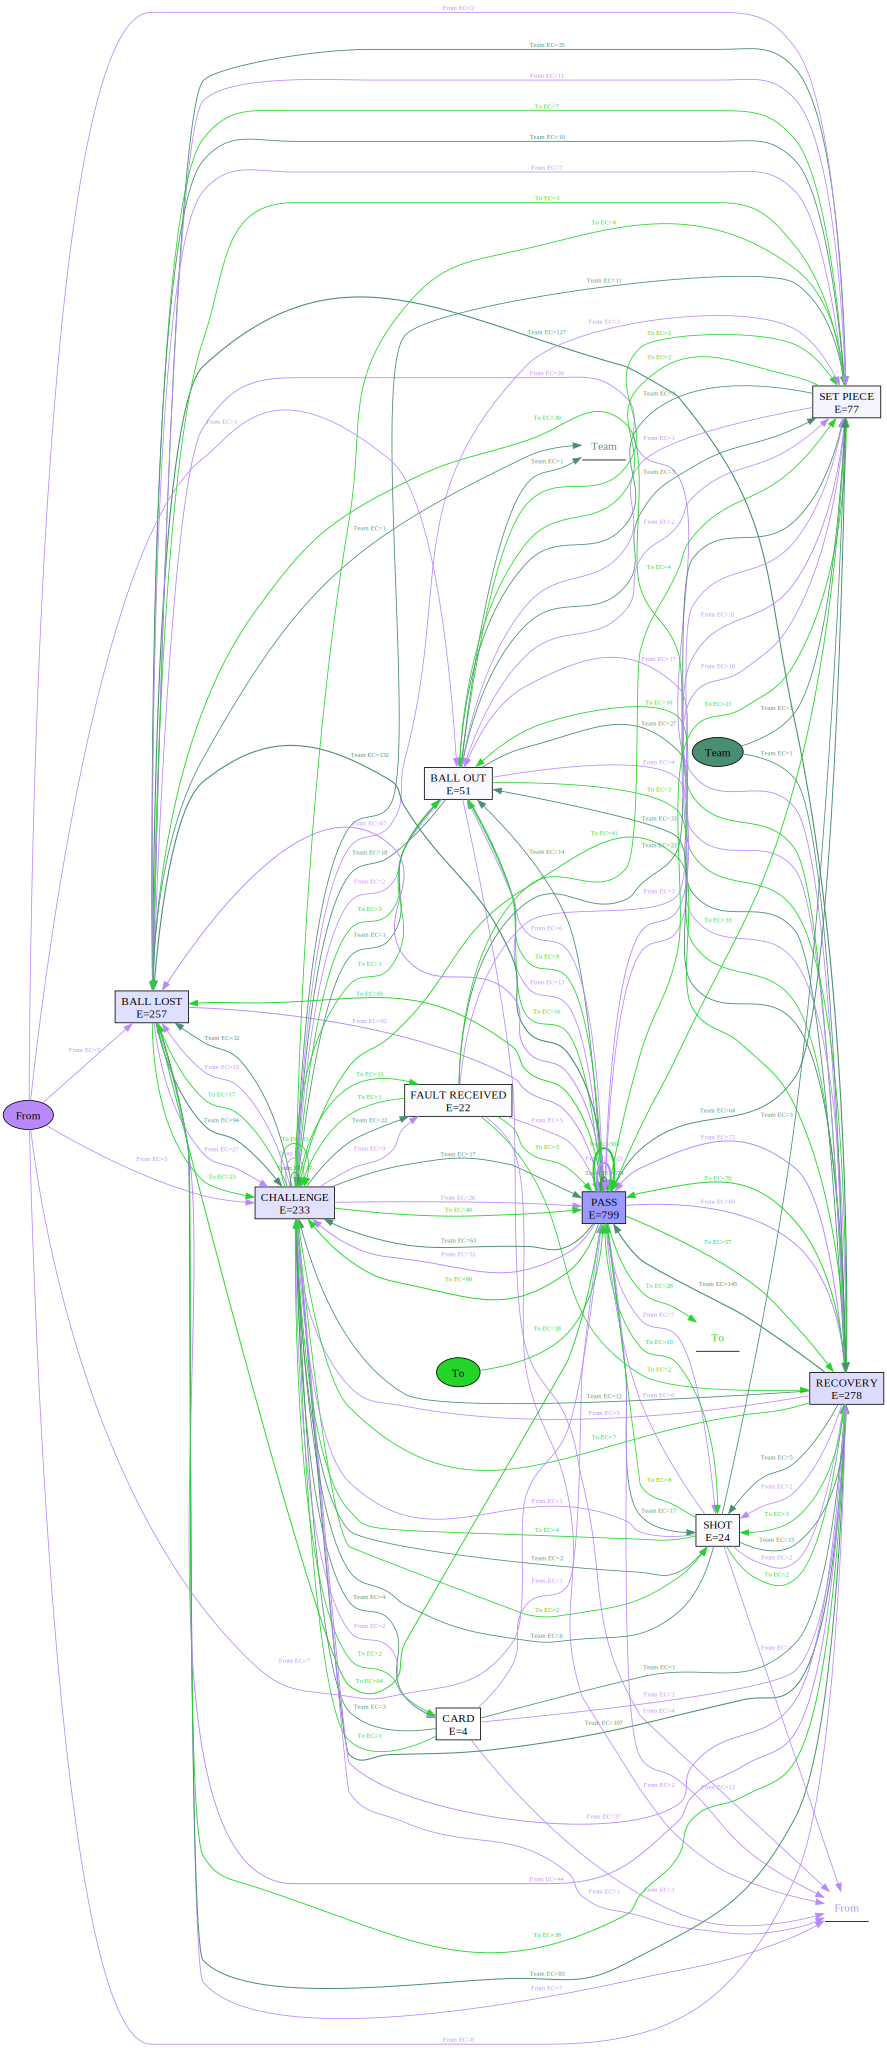

In [41]:
dfg=pm4py.ocel.discover_ocdfg(ocel)
pm4py.visualization.ocel.ocdfg.visualizer.apply(dfg)

In [ ]:
from ocpa.objects.log.importer.csv import factory as ocel_import_factory
filename = "sample-data\data\Sample_Game_1\Sample_Game_1_RawEventsData.csv"
object_types = ["From", "To"]
parameters = {"obj_names":object_types,
              "val_names":[],
              "act_name":"Type",
              "time_name":"Start Time [s]",
              "sep":","}
ocel = ocel_import_factory.apply(file_path= filename,parameters = parameters)

KeyError: 'sep'

In [4]:
df_log = pm4py.format_dataframe(df)

Exception: case:concept:name column (case ID) is not in the dataframe!